# Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 19 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту называйте файл и тему письма в следующем виде:<br\>
** [minor-da-16]*{Фамилия}*_hw*{Номер ДЗ}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [2]:
import scipy as sp
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 


При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

Сначала сгенерировали три распределения с помощью stats."распределение".rvs 

Использыем .var(ddof = 1) для подсчета несмещенной дисперсии.

1)Гауссовское:
мат ожидание = loc, дисперсия = $ (scale)^2$

2)Хи-квадрат:
степень свободы = df

3)Пуассоновское:
лямбда = mu

Затем создаем dataFrame, содержащее данные статистик по всем распределениям.

In [3]:
N = 500
dist_norm = stats.norm.rvs(loc = 1, scale = 2, size = N)
dist_chi = stats.chi2.rvs(df = 3, size = N)
dist_pois = stats.poisson.rvs(mu = 10, size = N)


In [4]:
a1,b1,c1,d1,e1,f1 = (dist_norm.mean(), dist_norm.min(),
                     dist_norm.max(), dist_norm.var(ddof = 1),
                     stats.skew(dist_norm),stats.kurtosis(dist_norm))

a2,b2,c2,d2,e2,f2 = (dist_chi.mean(), dist_chi.min(), 
                     dist_chi.max(), dist_chi.var(ddof = 1),
                     stats.skew(dist_chi),stats.kurtosis(dist_chi))

a3,b3,c3,d3,e3,f3 = (dist_pois.mean(), dist_pois.min(), 
                     dist_pois.max(), dist_pois.var(ddof = 1),
                     stats.skew(dist_pois),stats.kurtosis(dist_pois))


In [5]:
df = pd.DataFrame({'Среднее': (a1,a2,a3),
                   'Минимум': (b1,b2,b3),
                   'Максимум':(c1,c2,c3),
                   'Дисперсия':(d1,d2,d3),
                   'Кривизна':(e1,e2,e3),
                   'Смещенность':(f1,f2,f3)}, index = ["normal", "chi2", "poisson"])
df

,Дисперсия,Кривизна,Максимум,Минимум,Смещенность,Среднее
normal,4.049824,-0.218675,6.394051,-5.891374,0.071253,1.003269
chi2,5.853157,1.642253,17.009470,0.023819,3.816451,2.866180
poisson,10.140517,0.470673,22.000000,3.000000,0.336725,9.958000


**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

С помощью plt на двух подграфиках рисуем функцию плотности и распределения для каждого распределения. Медиана и среднее показаны на графике функции плотности как вертикальные прямые в соответствующей точке. Для каждого распределения используем rv, чтобы зафиксировать параметры распределения.

Mean =  1.0
Median = 1.0


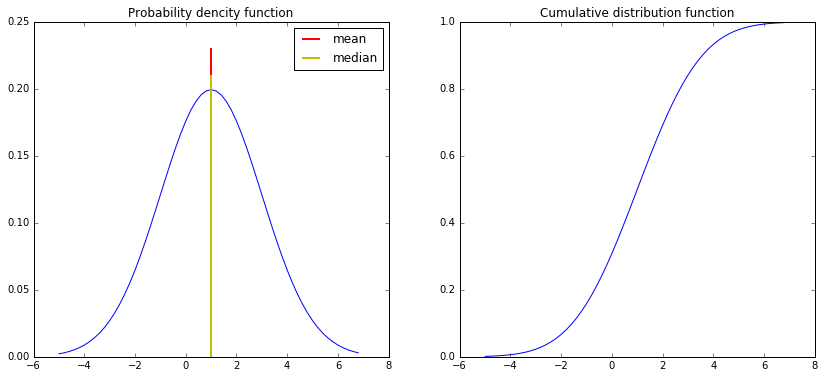

In [12]:
loc = 1
scale = 2

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(loc - 3*scale, loc + 3*scale, 0.2) # шаг 0.2, чтобы график был гладким

rv = stats.norm(loc, scale)

mn = rv.mean()
md = rv.median()

norm_dens = rv.pdf(x)
norm = rv.cdf(x)

ax[0].plot(x,norm_dens)
ax[0].plot([mn, mn], [0.23, 0], "r-", lw = 2, label = "mean")
ax[0].plot([md, md], [0.21, 0], "y-", lw = 2, label = "median")
ax[0].legend(loc = "best")
ax[1].plot(x, norm)


ax[0].set_title("Probability dencity function")
ax[1].set_title("Cumulative distribution function")

print("Mean = ", mn)
print("Median =", md)


Mean =  3.0
Median = 2.36597388438


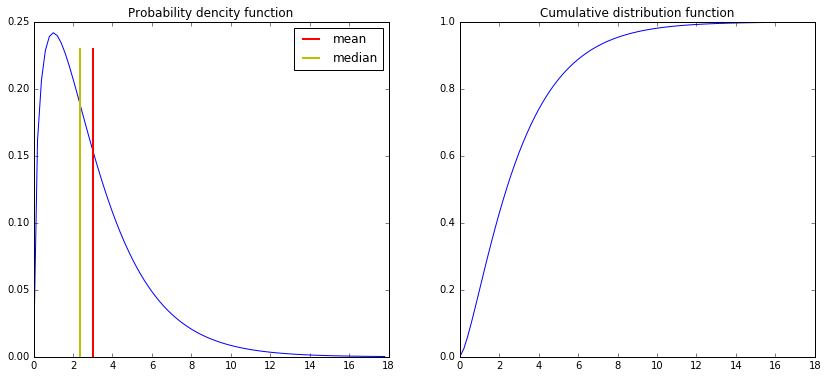

In [13]:
df = 3
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(0, 6*df, 0.2)

rv = stats.chi2(df)
mn = rv.mean()
md = rv.median()

chi_dens = rv.pdf(x)
chi = rv.cdf(x)

ax[0].plot(x, chi_dens)
ax[0].plot([mn, mn], [0.23, 0], "r-", lw = 2, label = "mean")
ax[0].plot([md, md], [0.23, 0], "y-", lw = 2, label = "median")
ax[0].legend(loc = "best")
ax[1].plot(x, chi)

ax[0].set_title("Probability dencity function")
ax[1].set_title("Cumulative distribution function")

print("Mean = ", mn)
print("Median =", md)

Mean =  10.0
Median = 10.0


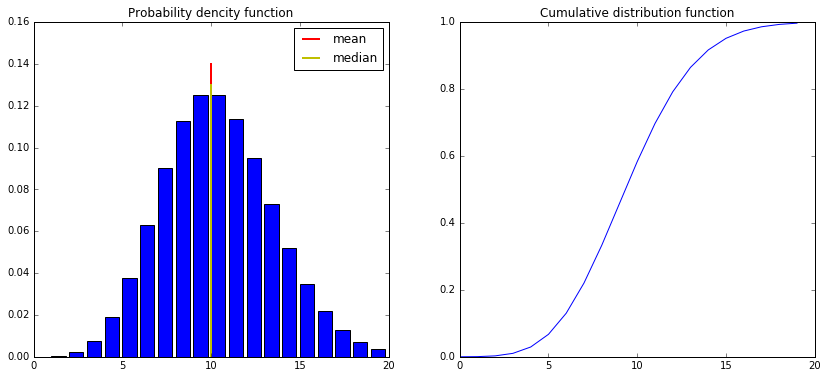

In [14]:
mu = 10
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
x = np.arange(0, 2*mu)

rv = stats.poisson(mu)
mn = rv.mean()
md = rv.median()

pois_dens = rv.pmf(x)
pois = rv.cdf(x)

ax[0].bar(x, pois_dens)
ax[0].plot([mn, mn], [0.14, 0], "r-", lw = 2, label = "mean")
ax[0].plot([md, md], [0.13, 0], "y-", lw = 2, label = "median")
ax[0].legend(loc = "best")
ax[1].plot(x, pois)

ax[0].set_title("Probability dencity function")
ax[1].set_title("Cumulative distribution function")

print("Mean = ", mn)
print("Median =", md)

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [15]:
a,b,c = (stats.describe(dist_norm), stats.describe(dist_chi), stats.describe(dist_pois))
print("Нормальное распределение:\n\n",a,"\n\n", "Хи-квадрат распределение:\n\n",b,"\n\n", "Пуассоновское распределение:\n\n",c)

Нормальное распределение:

 DescribeResult(nobs=500, minmax=(-5.8913741309637837, 6.3940506281865899), mean=1.0032688319123955, variance=4.0498235672088123, skewness=-0.21867538250456084, kurtosis=0.07125291928368771) 

 Хи-квадрат распределение:

 DescribeResult(nobs=500, minmax=(0.023819098635287743, 17.009469941585081), mean=2.8661800799235082, variance=5.8531568765837818, skewness=1.6422529707411317, kurtosis=3.8164511487982438) 

 Пуассоновское распределение:

 DescribeResult(nobs=500, minmax=(3, 22), mean=9.9580000000000002, variance=10.140517034068138, skewness=0.4706727745288868, kurtosis=0.33672498587145183)


## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

Коэффициент корреляции Пирсона определяет линейную зависимость между переменнами: изменение значения одной переменной влечет пропорциональное изменение значения другой.

Кэффициент Спирмена может определить не только линейную, но и монотонную зависимость.

In [132]:
result = pd.read_csv("beauty.csv")
result.head(5)

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3
2,7.96;35;0;1;0;1;0;0;10;4
3,11.57;38;0;1;0;0;1;1;16;3
4,11.42;27;0;1;0;0;1;0;16;3


Чтобы было удобнее работать, нужно разделить данный файла по столбцам. Все значения разделены знаком ";", поэтому при загрузке файла укажем, что разделение будет по символу ";"

In [133]:
beauty = pd.read_csv("beauty.csv", sep = ";")


In [18]:
beauty.shape
beauty.head(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


Теперь с помощью DataFrame.corr найдем коэффициент корреляции Пирсона и Спирмена по всем признакам.

In [19]:
res1 = beauty.corr(method='pearson', min_periods=1)
res1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.234632,0.094529,0.006756,-0.059052,-0.313419,0.184521,-0.053653,0.212333,0.055019
exper,0.234632,1.000000,0.089792,-0.131609,0.007566,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.094529,0.089792,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,0.006756,-0.131609,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.107129,0.058558
black,-0.059052,0.007566,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.138157,0.012098
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,1.000000


In [20]:
res2 = beauty.corr(method='spearman', min_periods=1)
res2

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,1.000000,0.360861,0.206118,0.047938,-0.125665,-0.448844,0.217270,-0.126311,0.262666,0.038234
exper,0.360861,1.000000,0.093393,-0.121028,-0.011096,-0.250583,0.285990,-0.041593,-0.138599,-0.152729
union,0.206118,0.093393,1.000000,-0.022398,0.031939,-0.100037,0.053629,-0.103633,-0.117902,-0.051098
goodhlth,0.047938,-0.121028,-0.022398,1.000000,-0.034073,-0.039684,-0.013315,0.049947,0.093197,0.057166
black,-0.125665,-0.011096,0.031939,-0.034073,1.000000,0.113703,-0.133306,0.017261,-0.111132,0.015194
female,-0.448844,-0.250583,-0.100037,-0.039684,0.113703,1.000000,-0.319228,0.267961,0.008033,0.021438
married,0.217270,0.285990,0.053629,-0.013315,-0.133306,-0.319228,1.000000,-0.075082,-0.061963,-0.066235
service,-0.126311,-0.041593,-0.103633,0.049947,0.017261,0.267961,-0.075082,1.000000,0.307787,0.016089
educ,0.262666,-0.138599,-0.117902,0.093197,-0.111132,0.008033,-0.061963,0.307787,1.000000,0.141147
looks,0.038234,-0.152729,-0.051098,0.057166,0.015194,0.021438,-0.066235,0.016089,0.141147,1.000000


Воспользуемся таблицей коэффициентов Спирмена (аналогично можно рассмотреть коэф. Пирсона). Сначала возьмем по модулю все значения в таблице, чтобы учесть также и отрицательную зависимость. Найдем максимальные значения с помощью ".apply(np.max)", исключая единицу, т.к. они в таблице показывают корреляцию между одним и тем же параметром(находятся на диагонали). Получим максимальные значения по каждому столбцу. Некоторые значения повторяются, потому что таблица корреляций симметрична относительно диагонали, поэтому воспользуемся ".drop.duplicates()", которое удалит повторяющиеся значения. Затем отсортируем по убыванию и возьмем первые 3 значения коэффициентов. Далее, зная сами коэффициенты, нужно найти к каким параметрам они относятся. Для этого к таблице res_abs применим условие, что коэффициенты равны нашим найденным максимальным. Получим таблицу, где есть только три коэффициента, а остальные значения = NaN, затем с помощью .dropna() удалим ненужные строки и получим сокращенную таблицу.

In [21]:
res1_abs = res1.apply(np.abs)
res1_max = res1_abs[res1_abs < 1].apply(np.max).drop_duplicates().sort_values(ascending = False).head(3)
res1_max = res1_abs[res1_abs == res1_max].dropna(axis = (0,1), how = 'all')

res2_abs = res2.apply(np.abs)
res2_max = res2_abs[res2_abs < 1].apply(np.max).drop_duplicates().sort_values(ascending = False).head(3)
res2_max = res2_abs[res2_abs == res2_max].dropna(axis = (0,1), how = 'all')


for i in res1_max.index:
    for l in res1_max.columns:
        if not np.isnan(res1_max.at[i,l]):
            print('Кэффициент корреляции Пирсона между признаками %s-%s = %f' %(i,l,res1.at[i,l]))
print("\n")    
for i in res2_max.index:
    for l in res2_max.columns:
        if not np.isnan(res2_max.at[i,l]):
            print('Кэффициент корреляции Cпирмена между признаками %s-%s = %f' %(i,l,res1.at[i,l]))    

Кэффициент корреляции Пирсона между признаками female-wage = -0.313419
Кэффициент корреляции Пирсона между признаками married-female = -0.319228
Кэффициент корреляции Пирсона между признаками educ-service = 0.301628


Кэффициент корреляции Cпирмена между признаками wage-exper = 0.234632
Кэффициент корреляции Cпирмена между признаками female-wage = -0.313419
Кэффициент корреляции Cпирмена между признаками female-married = -0.319228


1) Female - wage: отрицательная зависимость означает, что у мужчин зарботная плата выше.

2) Married - female: мужчины

3) Education - service: если человек занят в сфере обслуживания, мы будем предполагать, что его образование выше, чем если бы у нас не было такой информации.

4) Wage - experience: Чем больше у человека опыта работы, тем более высокую заработную плату он будет получать.

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

Изобразим гистограммы сразу по всем столбцам нашей таблицы.

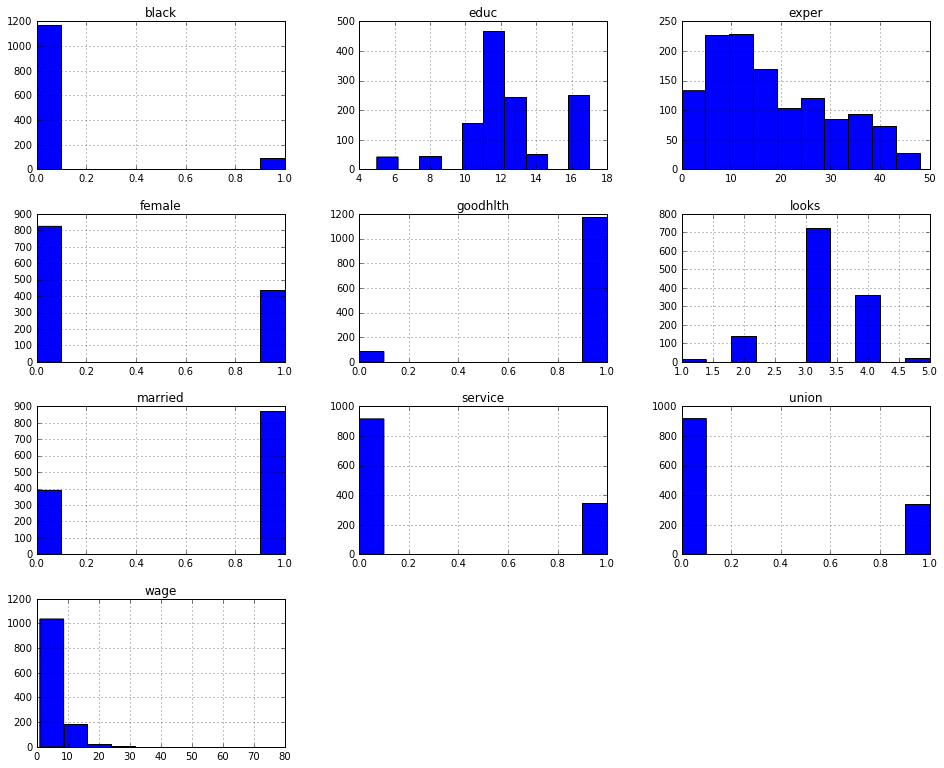

In [22]:
beauty.hist(figsize = (16,13))
plt.show()

У нас имеется 6 бинарных признаков, имеющих распределение Бернулли. Чтобы оценить параметр р методом максимального правдоподобия, создадим функцию, которая по названию параметра будет выводить искомую вероятность.

Отметим, что значения "0" и "1" для каждого признака - независимые величины, т.е. вероятность объединения событий = произведение вероятностей этих событий. Также при максимизации функции ML удобнее взять логарифм этой функции.

Сначала мы находим из нашего dataFrame количество "0" и "1" для признака х. Затем, используя пакет sympy, мы вводим параметр р как символ, составляем функцию максимального правдоподобия, зависящую от него, и максимизируем ее. В итоге, получаем оценку вероятности.

Создав список из данных 6 признаков, в цикле вызываем нашу функцию для каждого из них и выводим ответ на экран.



In [23]:
import sympy

# F_ml = p^(n_1)*(1-p)^(n_0)
#ML = ln(F_ml) = (n_1)*ln(p) + (n_0)*ln(1-p)

def probability(x):
    n_1 = beauty[x][beauty[x] == 1].value_counts()[1]
    n_0 = beauty[x][beauty[x] == 0].value_counts()[0]
    p, ML = sympy.symbols("p ML")
    ML = (n_1)*sympy.log(p) + (n_0)*sympy.log(1-p)
    res_p = sympy.solve(sympy.diff(ML,p), p)
    return res_p
list_1 = ["union", "goodhlth", "black", "female", "married", "service"]

for i in range(len(list_1)):
    print("Оценка вероятности для распределения признака",list_1[i],":", probability(list_1[i]))
    i += 1
    
   

Оценка вероятности для распределения признака union : [49/180]
Оценка вероятности для распределения признака goodhlth : [14/15]
Оценка вероятности для распределения признака black : [31/420]
Оценка вероятности для распределения признака female : [109/315]
Оценка вероятности для распределения признака married : [871/1260]
Оценка вероятности для распределения признака service : [23/84]


Теперь рассмотрим оставшиеся признаки:"educ","exper","looks","wage". Рассмотрим 3 основных непрерывных распределения: нормальное, chi2 и экспоненциальное. Для каждого из признака найдем выборочное среднее, выборочную дисперсию и  выборочное стандартное отклонение. С помощью метода fit, использующего оцнку максимального правдоподобия, получим оценку для нужных нам параметров.


Мат.ожидание по выборке: 18.206349206349206
Мат.ожидание распределения chi2: 18.2063476679


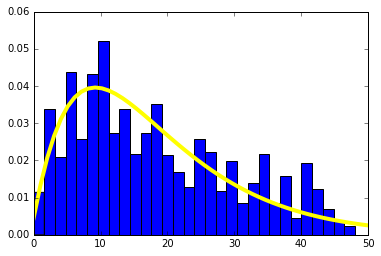

In [269]:
# Для exper подходит хи - квадрат
mean= beauty["exper"].mean() # параметры по нашей выборке
var = beauty["exper"].var()


res2 = stats.chi2.fit(beauty['exper']) 

dchi = stats.chi2(df = res2[0], loc = res2[1], scale = res2[2]) # Создадим оценочное распределение с параметрами, которое получили с помощью функции fit



print("Мат.ожидание по выборке:", mean)
print("Мат.ожидание распределения chi2:", dchi.mean())
dchi_d = dchi.pdf(np.linspace(0, 50))
plt.hist(beauty["exper"], bins = 30, normed = True)
plt.plot(np.linspace(0, 50), dchi_d, linewidth = 4, color = "yellow")



Мат.ожидание по выборке: 6.306690476190469
Мат.ожидание распределения chi2: 6.22175507228


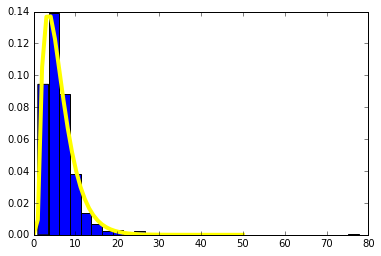

In [270]:
# Для wage подходит хи - квадрат
mean= beauty["wage"].mean() # параметры по нашей выборке
var = beauty["wage"].var()


res2 = stats.chi2.fit(beauty['wage'][beauty['wage'] < 40]) 
# Оценочные параметры для данных распределений. Используем значения < 40, 
# чтобы удиничные выбросы, "не портили" распределение chi2
dchi = stats.chi2(df = res2[0], loc = res2[1], scale = res2[2]) # Создадим оценочное распределение с параметрами, которое получили с помощью функции fit



print("Мат.ожидание по выборке:", mean)
print("Мат.ожидание распределения chi2:", dchi.mean())
dchi_d = dchi.pdf(np.linspace(0, 50))
plt.hist(beauty["wage"], bins = 30, normed = True)
plt.plot(np.linspace(0, 50), dchi_d, linewidth = 4, color = "yellow")

Мат.ожидание по выборке: 3.1857142857142855
Мат.ожидание распределения norm: 3.18571428571


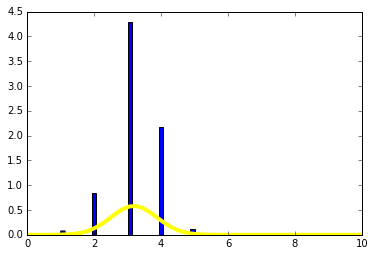

In [277]:
# Для looks подходит нормальное распределение
mean= beauty["looks"].mean() # параметры по нашей выборке
var = beauty["looks"].var()


res2 = stats.norm.fit(beauty['looks']) 

dnorm = stats.norm(loc = res2[0], scale = res2[1]) # Создадим оценочное распределение с параметрами, которое получили с помощью функции fit



print("Мат.ожидание по выборке:", mean)
print("Мат.ожидание распределения norm:", dnorm.mean())
dnorm_d = dnorm.pdf(np.linspace(0, 10))
plt.hist(beauty["looks"], bins = 30, normed = True)
plt.plot(np.linspace(0, 10), dnorm_d, linewidth = 4, color = "yellow")

Мат.ожидание по выборке: 12.563492063492063
Мат.ожидание распределения norm: 12.5634920635


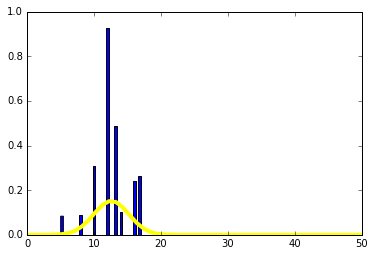

In [273]:
# Для educ подходит нормальное распределение
mean= beauty["educ"].mean() # параметры по нашей выборке
var = beauty["educ"].var()


res2 = stats.norm.fit(beauty['educ']) 

dnorm = stats.norm(loc = res2[0], scale = res2[1]) # Создадим оценочное распределение с параметрами, которое получили с помощью функции fit



print("Мат.ожидание по выборке:", mean)
print("Мат.ожидание распределения norm:", dnorm.mean())
dnorm_d = dnorm.pdf(np.linspace(0, 50))
plt.hist(beauty["educ"], bins = 30, normed = True)
plt.plot(np.linspace(0, 50), dnorm_d, linewidth = 4, color = "yellow")

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [171]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [172]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью функции fetch_20newsgroups() выбираем 2 категории из "all". Затем создаем 4 переменные посредством разделения text_all на 2 части: тренировочную и тестовую, и разделения соответствующих им категорий.

In [173]:
text_all = fetch_20newsgroups(subset = "all",
                              categories = ["sci.med","talk.politics.mideast"],
                              random_state = 50)
text_train, text_test, y_train, y_test = train_test_split(text_all.data, text_all.target, test_size = 0.3, random_state = 50)

In [174]:
text_all.target_names  #посмотрим, что хранится в text_all
print(len(text_all.target))
print(text_all.target[:33])
for i in text_all.target[:33]:
    print(text_all.target_names[i])
print(text_all.data[0])

1930
[1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1]
talk.politics.mideast
sci.med
talk.politics.mideast
sci.med
sci.med
talk.politics.mideast
sci.med
talk.politics.mideast
sci.med
sci.med
talk.politics.mideast
talk.politics.mideast
talk.politics.mideast
sci.med
talk.politics.mideast
sci.med
sci.med
sci.med
talk.politics.mideast
sci.med
sci.med
sci.med
sci.med
sci.med
sci.med
sci.med
talk.politics.mideast
sci.med
talk.politics.mideast
sci.med
talk.politics.mideast
sci.med
talk.politics.mideast
From: farzin@apollo3.ntt.jp (Farzin Mokhtarian)
Subject: News briefs from KH # 1026
Originator: sehari@vincent1.iastate.edu
Organization: NTT Corp. Japan
Lines: 31


From:  Kayhan Havai # 1026
--------------------------
                    
                         
o Dr. Namaki,  deputy minister of health stated that infant
  mortality (under one year old) in Iran went down from 120 
  per  thousand before the revolution to 33 per thousand at
  the end of 1371 (last month).
 

**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

Переведем данные в матрицы, где будет храниться информация о словах, которые встречались в text_train и text_test, их количестве.

In [244]:
text = CountVectorizer(analyzer = "word", stop_words = "english", lowercase = True)
text.fit(text_all.data)
X_test = text.transform(text_test)
X_train = text.transform(text_train)



In [245]:
print(X_train.shape) 
type(X_train)


(1351, 34481)


scipy.sparse.csr.csr_matrix

**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

Сначала просуммируем значения в матрице X_train по всем индексам, затем создадим датафрейм из слов и их количества, отсортируем и выведем первые 50 значений.

In [246]:
X_train_sum = X_train.sum(axis = 0)
X_train_values = text.get_feature_names()
df_train = pd.DataFrame({"Counts":X_train_sum.tolist()[0],
                         "Words":X_train_values})
df_train.sort_values(by = "Counts", ascending = False).head(50)

,Counts,Words
11994,2982,edu
30105,1485,subject
24025,1396,people
19640,1368,lines
8682,1331,com
23201,1317,organization
34037,1185,writes
4983,1170,article
17894,1035,israel
32497,868,university


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

Применив классификатор к тестовой выборке, оцениваем точность с помощью .score, который возвращает среднее значение правильных предсказаний, т.е. точность совпадения.

In [247]:
clf_1 = MultinomialNB(alpha = 1)
rfit_1 = clf_1.fit(X_train, y_train)

a = rfit_1.score(X_test, y_test)
a

0.99654576856649391

**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [248]:
clf_2 = MultinomialNB(alpha = 0)
rfit_2 = clf_2.fit(X_train, y_train)
b = rfit_2.score(X_test, y_test)
b

0.60449050086355782

Точность совпадения намного меньше. В тестовой выборке может оказаться слово, которого не было в выборке трэйн, тогда, считая вероятность по формуле Байеса, получим, что P(x|y) = 0, а значит и вероятность того, что текст принадлежит данной категории будет нулевой. Чем больше сглаживания, тем меньшее влияние имеют такие "выбросы" на итоговую точность.
